#### Importing Packages

In [91]:
import pandas as pd
import cleantext
import spacy
import string
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.semi_supervised import LabelSpreading

In [3]:
warnings.simplefilter("ignore")

#### 2. Reading the dataset

In [4]:
coursework_dataset = pd.read_csv("comp1804_coursework_dataset_23-24.csv")

In [140]:
data = pd.read_csv("comp1804_coursework_dataset_23-24.csv")

#### Dataset Main Characteristics

##### 1. Dimension of Dataset

In [5]:
print(coursework_dataset.shape)

(9347, 8)


The dataset contains 9347 observations(rows) and 8 columns

The first 5 records in the dataset are:

In [6]:
coursework_dataset.head()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough


The last 5 records in the dataset are:

In [7]:
coursework_dataset.tail()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies,NaN
9343,50634005203,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies,NaN
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies,NaN
9345,725259002815,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming,NaN
9346,109126000894,"Governments, and especially the police and cou...",ORG_NO_PRODUCT_NO_PERSON_NO_,87,8.0,man,philosophy,NaN


The column names(features) are:

In [8]:
coursework_dataset.columns

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

The data type of column fields are:

In [9]:
coursework_dataset.dtypes

par_id                  int64
paragraph              object
has_entity             object
lexicon_count           int64
difficult_words       float64
last_editor_gender     object
category               object
text_clarity           object
dtype: object

The datset has 3 numerical features

Summary statistics of numerical features

In [10]:
coursework_dataset.describe()

,par_id,lexicon_count,difficult_words
count,9.347000e+03,9347.000000,9329.000000
mean,3.568369e+11,81.981277,21.514203
std,3.221399e+11,63.533532,16.307358
min,8.500328e+07,0.000000,0.000000
25%,7.019601e+10,33.000000,9.000000
50%,2.684380e+11,64.000000,17.000000
75%,6.124310e+11,117.000000,30.000000
max,1.058779e+12,653.000000,143.000000


The maximum number of words a sentence has is 653 and the minimum is 0. The maximum number of difficult words a sentence has is 143 and the minimum is 0

Information about categorical columns in the dataset

In [11]:
# list all categorical columns
categorical_columns = ['last_editor_gender','category','text_clarity']
# find the count of each column
for column in categorical_columns:
    print(f"Categories and number of occurrences for {column}: ")
    print(coursework_dataset[column].value_counts())
    print()

Categories and number of occurrences for last_editor_gender: 
last_editor_gender
man                  6244
woman                2466
non-binary            361
prefer_not_to_say     276
Name: count, dtype: int64

Categories and number of occurrences for category: 
category
biographies                             2942
philosophy                              2585
programming                             1980
artificial intelligence                 1565
movies about artificial intelligence     166
Philosophy                                13
Biographies                               13
Artificial intelligence                   11
Programming                               10
Movies about artificial intelligence       1
Name: count, dtype: int64

Categories and number of occurrences for text_clarity: 
text_clarity
clear_enough        5
not_clear_enough    4
Name: count, dtype: int64



##### Checking for any issues in the dataset

1. Duplicate Values

In [12]:
#checking for duplicate values in the dataset. The result will be True for rows that are a duplicate and False for rows that are not a duplicate
duplicate_entries = coursework_dataset.duplicated()
print(f'There are {duplicate_entries.sum()} duplicate rows.')

There are 215 duplicate rows.


2. Missing Values

In [13]:
print(coursework_dataset.isna().sum())

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64


Here the column 'difficult_words' have 18 missing values, 'category' has 61 missing values and 'text_clarity' has 9338 missing values

3. Mismatched Values

In [14]:
categorical_columns = ['last_editor_gender','category','text_clarity']
# find the count of each column
for column in categorical_columns:
    print(f"Categories and number of occurrences for {column}: ")
    print(coursework_dataset[column].value_counts())
    print()

Categories and number of occurrences for last_editor_gender: 
last_editor_gender
man                  6244
woman                2466
non-binary            361
prefer_not_to_say     276
Name: count, dtype: int64

Categories and number of occurrences for category: 
category
biographies                             2942
philosophy                              2585
programming                             1980
artificial intelligence                 1565
movies about artificial intelligence     166
Philosophy                                13
Biographies                               13
Artificial intelligence                   11
Programming                               10
Movies about artificial intelligence       1
Name: count, dtype: int64

Categories and number of occurrences for text_clarity: 
text_clarity
clear_enough        5
not_clear_enough    4
Name: count, dtype: int64



The column 'category' contains mismatched values:

1. biographies should be the same as Biographies
2. philosophy should be the same as Philosophy
3. programming should be the same as Programming
4. artificial intelligence should be the same as Artificial intelligence
5. movies about artificial intelligence should be the same as Movies about artificial intelligence

Here we have to perform two tasks, one is topic classification and the other one is text clarity classification. So, the target labels are 'category' and 'text_clarity'

In [15]:
# Removing the duplicate rows
coursework_dataset = coursework_dataset.drop_duplicates()

In [16]:
# Dimension of dataset after removing the duplicate values
coursework_dataset.shape

(9132, 8)

After removing duplicate entries, the dataset has 9132 rows and 8 columns

### Task 1: Topic Classification

In this task, the model should predict whether a given paragraph of text is about "artificial intelligence", "movies about artificial intelligence", "programming", "philosophy" or "biographies". For Topic classification, the input features to be used are 'paragraph' and 'has_entity' and the label i.e., the topic to be predicted is in the column 'category'. The first step is to extract these input features and labels from the original dataset..

In [17]:
# Extracting the input features and label column necessary for topic classification from the dataset
features = ['paragraph','has_entity']
feature_dataset = coursework_dataset[features]
label = coursework_dataset[['category']].copy()

In [18]:
# Shape of feature dataset
print(f" Shape of feature dataset is {feature_dataset.shape}")
# Shape of label dataset
print(f" Shape of label dataset is {label.shape}")

 Shape of feature dataset is (9132, 2)
 Shape of label dataset is (9132, 1)


In [19]:
# Data Splitting
train_dataset, test_dataset, train_label, test_label = train_test_split(feature_dataset,label,
                                                                        test_size=0.2,
                                                                        stratify=label,
                                                                        shuffle=True,
                                                                        random_state=7
                                                                       )

ValueError: Input contains NaN

Here when trying to do a stratified split, got a valueError since stratified split is based on the values in the label variable and it have null values. So, before doing stratified split, null values in the label should be removed

In [20]:
print("Missing value count in feature dataset")
print(feature_dataset.isna().sum())
print()

print("Missing value count in label data")
print(label.isna().sum())

Missing value count in feature dataset
paragraph     0
has_entity    0
dtype: int64

Missing value count in label data
category    61
dtype: int64


The label column 'category' contains 61 missing values. Here, the ideal approach is to remove those missing values.

In [21]:
# Removing the missing values
print("Shape of the dataset before removing missing values")
print(f"Feature dataset shape: {feature_dataset.shape}")
print(f"Label dataset shape: {label.shape}")

Shape of the dataset before removing missing values
Feature dataset shape: (9132, 2)
Label dataset shape: (9132, 1)


In [22]:
# Removing missing values from the label dataset
label = label.dropna()
# Removing corresponding rows from the feature dataset
feature_dataset = feature_dataset.loc[label.index]

In [23]:
print("Shape of the dataset after removing missing values")
print(f"Feature dataset shape: {feature_dataset.shape}")
print(f"Label dataset shape: {label.shape}")
print()

Shape of the dataset after removing missing values
Feature dataset shape: (9071, 2)
Label dataset shape: (9071, 1)



Handling the Mismatched values in the label

In [24]:
# label count before handling mismatched values
print(label.value_counts())

category                            
biographies                             2886
philosophy                              2511
programming                             1938
artificial intelligence                 1527
movies about artificial intelligence     162
Biographies                               13
Philosophy                                13
Artificial intelligence                   10
Programming                               10
Movies about artificial intelligence       1
Name: count, dtype: int64


In [25]:
label.loc[label.category=='Biographies','category'] = 'biographies'
label.loc[label.category=='Philosophy','category'] = 'philosophy'
label.loc[label.category=='Programming','category'] = 'programming'
label.loc[label.category=='Artificial intelligence','category'] = 'artificial intelligence'
label.loc[label.category=='Movies about artificial intelligence','category'] = 'movies about artificial intelligence'

In [26]:
# Label count after handling mismatched values
print(label.value_counts())

category                            
biographies                             2899
philosophy                              2524
programming                             1948
artificial intelligence                 1537
movies about artificial intelligence     163
Name: count, dtype: int64


Here, the dataset is imbalanced. To ensure equal distribution of each class in the train and test data, a stratified split will be done

In [27]:
train_dataset, test_dataset, train_label, test_label = train_test_split(feature_dataset,label,
                                                                        test_size=0.2,
                                                                        stratify=label,
                                                                        shuffle=True,
                                                                        random_state=7)                                                                      

In [28]:
# Shape of training feature data
print("The shape of training dataset is: ")
print(train_dataset.shape)
# Shape of training label data
print("The shape of the label data is: ")
print(train_label.shape)

The shape of training dataset is: 
(7256, 2)
The shape of the label data is: 
(7256, 1)


In [29]:
# Shape of test feature data
print("The shape of test dataset is: ")
print(test_dataset.shape)
# Shape of test label data
print("The shape of the label data is: ")
print(test_label.shape)

The shape of test dataset is: 
(1815, 2)
The shape of the label data is: 
(1815, 1)


Handling the class imbalance in the training data

In [30]:
# Class distribution before handling class imbalance
print(train_label.value_counts())

category                            
biographies                             2319
philosophy                              2019
programming                             1558
artificial intelligence                 1230
movies about artificial intelligence     130
Name: count, dtype: int64


In [31]:
# Creating an instance of RandomOverSampler
sampler = RandomOverSampler(random_state=42)
train_dataset_resampled , train_label_resampled = sampler.fit_resample(train_dataset,train_label)

In [32]:
# Shape of the resampled training data 
# Shape of training feature data
print(f"The shape of resampled training dataset is: {train_dataset_resampled.shape}")
# Shape of training label data
print(f"The shape of the resampled label data is: {train_label_resampled.shape}")

The shape of resampled training dataset is: (11595, 2)
The shape of the resampled label data is: (11595, 1)


In [33]:
# Class distribution after handling class imbalance
print(train_label_resampled.value_counts())

category                            
artificial intelligence                 2319
biographies                             2319
movies about artificial intelligence    2319
philosophy                              2319
programming                             2319
Name: count, dtype: int64


Preprocessing of text data in the feature training dataset

In [34]:
# creating an nlp pipeline
nlp = spacy.load('en_core_web_md')


def clean_text(x):
  """function to clean the text data"""
  return cleantext.clean(x,
      clean_all= True,
      extra_spaces= True,
      stemming= True,
      stopwords= True,
      lowercase= True,
      numbers= True,
      punct= True,
      reg = '',
      reg_replace = '',
      stp_lang = 'english'
)

def pre_processing_has_entity(text):
    """function to preprocess the has_entity column"""
    entities = text.split("_")
    preprocessed_data = {}
    for i in range(0,len(entities)-1,2):
        entity = entities[i]
        result = entities[i+1]
        preprocessed_data[f"{entity}"] = result
    return preprocessed_data

Training Data:

In [35]:
# Cleaning the paragraph column
train_dataset_resampled['cleaned_paragraph'] = train_dataset_resampled['paragraph'].apply(clean_text)
# Preprocessing the has_entity column
preprocessed_has_entity_field_train_dataset = train_dataset_resampled['has_entity'].apply(pre_processing_has_entity)
# Converting to a dataframe
preprocessed_has_entity_field_train_dataset = pd.DataFrame(preprocessed_has_entity_field_train_dataset.tolist(),index=train_dataset_resampled.index)
# Concatenating the two data frames
train_dataset_resampled = pd.concat([train_dataset_resampled,preprocessed_has_entity_field_train_dataset],axis=1)

In [36]:
# Displaying the first 5 records
train_dataset_resampled.head()

,paragraph,has_entity,cleaned_paragraph,ORG,PRODUCT,PERSON
0,"John Hick used the term ""soul-making"" in his t...",ORG_YES_PRODUCT_NO_PERSON_YES_,john hick use term soulmak theodici evil god l...,YES,NO,YES
1,The field of experimental aesthetics was found...,ORG_YES_PRODUCT_NO_PERSON_NO_,field experiment aesthet found gustav theodor ...,YES,NO,NO
2,"Buddhists, Jains, Advaita Vedantins and Nyaya ...",ORG_YES_PRODUCT_NO_PERSON_YES_,buddhist jain advaita vedantin nyaya philosoph...,YES,NO,YES
3,"Wallis Simpson and the Prince of Wales, it is...",ORG_YES_PRODUCT_NO_PERSON_YES_,walli simpson princ wale gener accept becam lo...,YES,NO,YES
4,An AutoIt automation script can be converted i...,ORG_YES_PRODUCT_NO_PERSON_NO_,autoit autom script convert compress standalon...,YES,NO,NO


Test Data

In [37]:
# Cleaning the paragraph column of test dataset
test_dataset['cleaned_paragraph'] = test_dataset['paragraph'].apply(clean_text)
# Preprocessing the has_entity column
preprocessed_has_entity_field_test = test_dataset['has_entity'].apply(pre_processing_has_entity)
# Converting to a dataframe
preprocessed_has_entity_field_test = pd.DataFrame(preprocessed_has_entity_field_test.tolist(),index=test_dataset.index)
#concatenating the two data frames
test_dataset = pd.concat([test_dataset,preprocessed_has_entity_field_test],axis=1)

##### Preprocessing using Word Embedding

In [38]:
def get_spacy_doc_embedding(text_):
  ''' Function to generate Spacy document embedding. '''
  doc_ = nlp(text_)
  return doc_.vector

Training Data

In [39]:
# Generate word embedding of the cleaned paragraph
train_dataset_embedding = train_dataset_resampled['cleaned_paragraph'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))
new_train_dataset = train_dataset_embedding.join(train_dataset_resampled[['ORG','PRODUCT','PERSON']])
new_train_dataset.columns = new_train_dataset.columns.astype(str)

In [40]:
# Displaying the first 5 records
new_train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,ORG,PRODUCT,PERSON
0,0.009769,1.001216,-1.602466,-0.888339,0.731310,1.117068,0.569071,1.784467,-1.948487,-0.375826,...,-1.008738,-0.137404,-0.965697,0.388342,0.319274,-1.836233,1.271920,YES,NO,YES
1,-0.933862,0.475163,-0.515476,-0.540487,2.070295,-0.135704,1.334800,2.385074,-2.197414,-0.174947,...,-0.167557,-0.917837,-0.105178,0.679002,-0.887727,-2.237136,1.071754,YES,NO,NO
2,-0.414723,0.704564,-0.577845,0.192847,1.679376,0.451631,0.852218,1.429127,-1.715945,-0.479872,...,-0.742006,-0.641259,0.195558,0.304626,-0.693979,-1.390856,0.642802,YES,NO,YES
3,-0.752852,-0.062103,-0.892937,-0.795269,2.391357,-0.169364,0.991275,2.113762,-0.086305,-0.111759,...,0.080874,-1.019061,-0.234316,0.109499,-0.065493,-1.609763,0.636694,YES,NO,YES
4,-0.686241,-0.230093,-0.462214,0.966549,1.602601,-0.546677,0.433740,1.977868,-2.765212,-0.293273,...,0.018563,0.014968,0.342582,-0.107404,-1.339182,-0.994062,-0.069601,YES,NO,NO


In [41]:
train_label_resampled

,category
0,philosophy
1,philosophy
2,philosophy
3,biographies
4,programming
...,...
11590,programming
11591,programming
11592,programming
11593,programming


Encoding the Label Values

In [42]:
# Creating an instance of LabelEncoder class
label_encoder_train = LabelEncoder()
# apply LabelEncoder object to our target variables
train_label_resampled['encoded_category'] = label_encoder_train.fit_transform(train_label_resampled['category'])
print(train_label_resampled.value_counts())

category                              encoded_category
artificial intelligence               0                   2319
biographies                           1                   2319
movies about artificial intelligence  2                   2319
philosophy                            3                   2319
programming                           4                   2319
Name: count, dtype: int64


Test Data

In [43]:
# Generate word embedding of the cleaned paragraph
test_dataset_emb = test_dataset['cleaned_paragraph'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))
new_test_dataset = test_dataset_emb.join(test_dataset[['ORG','PRODUCT','PERSON']])
new_test_dataset.columns = new_test_dataset.columns.astype(str)

In [44]:
# Displaying the first 5 records
new_test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,ORG,PRODUCT,PERSON
2443,-0.440016,0.797404,0.000567,-0.154423,0.574914,0.444597,-0.022638,1.165029,-1.390278,-0.264556,...,0.931382,0.307954,0.062838,-0.010124,-0.865599,-0.776534,0.738524,YES,NO,NO
5136,-0.783944,-0.075364,-1.201752,-0.489873,1.512461,-0.068065,1.251508,2.319936,-1.993388,-0.181042,...,-0.163901,-0.928999,-0.417663,0.496509,-0.897884,-1.699379,-0.007377,YES,NO,NO
3021,0.095344,-0.129305,-1.930642,0.159523,0.744735,-1.688084,1.587933,1.988103,-0.682364,1.731649,...,-0.276139,-0.708870,0.170996,0.017254,0.852851,-0.026724,-0.620862,YES,NO,YES
5950,-1.289461,0.018915,-0.122947,-1.340068,0.780229,-0.340170,0.944304,0.954256,-0.838138,0.297490,...,-0.094743,-0.786113,0.131933,0.948843,-0.589950,-1.645759,0.876987,NO,NO,YES
7530,0.036264,0.782082,-2.336931,0.166007,2.197212,1.080420,0.588951,2.120431,-1.110262,-1.194872,...,-0.738627,-0.633299,0.055722,-0.432625,-0.335292,-1.972489,0.872676,NO,NO,NO


In [45]:
# Encoding target variable of test data
# apply LabelEncoder object to target variable
test_label['encoded_category'] = label_encoder_train.fit_transform(test_label['category'])
print(test_label.value_counts())

category                              encoded_category
biographies                           1                   580
philosophy                            3                   505
programming                           4                   390
artificial intelligence               0                   307
movies about artificial intelligence  2                    33
Name: count, dtype: int64


In [46]:
# creating the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('feature encoding', OneHotEncoder(), ['ORG','PRODUCT','PERSON']),
        ('scaling', StandardScaler(), [str(i) for i in range(300)])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

##### Model building and Evaluation

###### 1. Logistic Regression
Model Building

In [50]:
# defining the Logistic Regression pipeline
clf_lr_ = Pipeline(
        steps =[('encoding', preprocessor),
              ('clf_lr', LogisticRegression()),
      ]
    )

#defining the hyperparameters
hyperparameters_lr = {
    'clf_lr__penalty': ['l2','None'],
    'clf_lr__solver': ['newton-cg', 'sag', 'saga', 'lbfgs' ],
    'clf_lr__C': [0.01, 0.1,0.5,1],
    'clf_lr__multi_class': ['auto', 'ovr', 'multinomial'],
}


# create the GridSearch function
clf_search = GridSearchCV(clf_lr_, hyperparameters_lr, scoring= "accuracy", cv= 5, return_train_score=True) #we can use accuracy here since the dataset is balanced
# Fit all the possible hyper-parameters combinations using cross-validation.
_ =clf_search.fit(new_train_dataset, train_label_resampled['encoded_category'])

In [51]:
print(clf_search.best_score_, clf_search.best_params_)

0.8864165588615783 {'clf_lr__C': 0.1, 'clf_lr__multi_class': 'auto', 'clf_lr__penalty': 'l2', 'clf_lr__solver': 'lbfgs'}


Model Evaluation

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       307
           1       0.89      0.87      0.88       580
           2       0.59      0.79      0.68        33
           3       0.85      0.84      0.84       505
           4       0.92      0.89      0.90       390

    accuracy                           0.85      1815
   macro avg       0.79      0.83      0.81      1815
weighted avg       0.85      0.85      0.85      1815



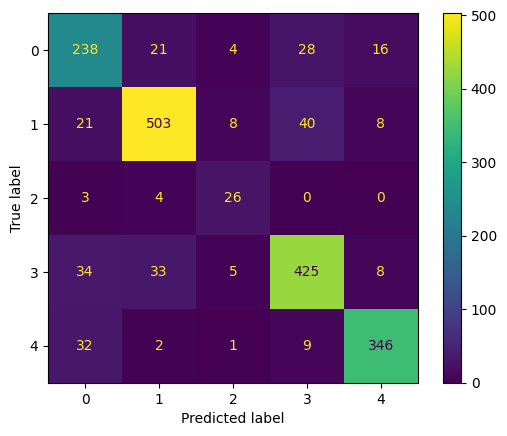

In [54]:
best_clf = clf_search.best_estimator_
label_pred = best_clf.predict(new_test_dataset)
print(classification_report(test_label['encoded_category'], label_pred))
cm= ConfusionMatrixDisplay.from_estimator(best_clf, new_test_dataset, test_label['encoded_category'])

###### 2. RandomForest

Model Building

In [47]:
# defining the randomforest pipeline
clf_rf_ = Pipeline(
        steps =[('encoding', preprocessor),
              ('clf_rf', RandomForestClassifier()),
      ]
    )

#defining the hyperparameters
hyperparameters_rf = {
    'clf_rf__n_estimators': [100,200,300],
    'clf_rf__criterion': ['gini','entropy','log_loss'],
    'clf_rf__max_features': ['auto', 'sqrt'],
    'clf_rf__bootstrap': [True, False]
}


# create the GridSearch function
clf_search = GridSearchCV(clf_rf_, hyperparameters_rf, scoring= "accuracy", cv= 5, return_train_score=True) #we can use accuracy here since the dataset is balanced
# Fit all the possible hyper-parameters combinations using cross-validation.
_ =clf_search.fit(new_train_dataset, train_label_resampled['encoded_category'])

In [48]:
print(clf_search.best_score_, clf_search.best_params_)

0.9133247089262613 {'clf_rf__bootstrap': False, 'clf_rf__criterion': 'gini', 'clf_rf__max_features': 'sqrt', 'clf_rf__n_estimators': 200}


Model Evaluation

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       307
           1       0.80      0.89      0.84       580
           2       0.85      0.33      0.48        33
           3       0.81      0.81      0.81       505
           4       0.83      0.86      0.85       390

    accuracy                           0.81      1815
   macro avg       0.81      0.71      0.74      1815
weighted avg       0.81      0.81      0.80      1815



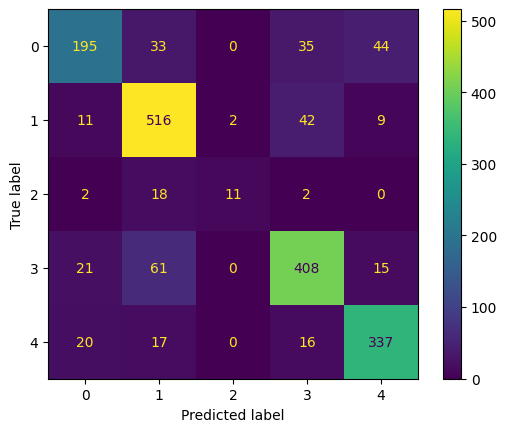

In [51]:
best_clf = clf_search.best_estimator_
label_pred = best_clf.predict(new_test_dataset)
print(classification_report(test_label['encoded_category'], label_pred))
cm= ConfusionMatrixDisplay.from_estimator(best_clf, new_test_dataset, test_label['encoded_category'])

##### Preprocessing using TFIDF Vectorizer

In [52]:

EXTRA_PUNCT = string.punctuation
def preprocess_text(text_):
  """
  This function takes a Spacy doc and returns the list of its lemmas
  """
  doc_ = nlp(text_)
  lemmas_ = [token.lemma_ for token in doc_ ]
  return [lemma for lemma in lemmas_ if lemma not in EXTRA_PUNCT]


In [53]:
# Generating tokens of the cleaned paragraph of training data
train_dataset_resampled['tokenized_text'] = train_dataset_resampled['cleaned_paragraph'].apply(preprocess_text)
# Displaying the tokens generated for the first 5 rows
train_dataset_resampled['tokenized_text'].head()

0    [john, hick, use, term, soulmak, theodici, evi...
1    [field, experiment, aesthet, find, gustav, the...
2    [buddhist, jain, advaita, vedantin, nyaya, phi...
3    [walli, simpson, princ, wale, gener, accept, b...
4    [autoit, autom, script, convert, compress, sta...
Name: tokenized_text, dtype: object

In [54]:
# Generating tokens of the cleaned paragraph of test data
test_dataset['tokenized_text'] = test_dataset['cleaned_paragraph'].apply(preprocess_text)
# Displaying the tokens generated for the first 5 rows
test_dataset['tokenized_text'].head()

2443    [tix, tk, interfac, extens, set, user, interfa...
5136    [well, explor, experiment, materi, project, al...
3021    [stain, glass, window, dine, hall, gonvil, cai...
5950    [edward, commonli, know, close, david, bear, f...
7530    [unadulter, nonviol, noncooper, whole, india, ...
Name: tokenized_text, dtype: object

In [55]:
# creating the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text encoding', TfidfVectorizer(lowercase=False,tokenizer=lambda x: x), 'tokenized_text'),
        ('feature encoding', OneHotEncoder(), ['ORG','PRODUCT','PERSON'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [56]:
# Columns to be transformed
columns = ['tokenized_text','ORG','PRODUCT','PERSON']

##### Model building and evaluation

1. Logistic Regression

In [57]:
# defining the Logistic Regression pipeline
clf_lr_ = Pipeline(
        steps =[('encoding', preprocessor),
              ('clf_lr', LogisticRegression()),
      ]
    )

#defining the hyperparameters
hyperparameters_lr = {
    'clf_lr__penalty': ['l2','None'],
    'clf_lr__solver': ['newton-cg', 'sag', 'saga', 'lbfgs' ],
    'clf_lr__C': [0.01, 0.1,0.5,1],
    'clf_lr__multi_class': ['auto', 'ovr', 'multinomial'],
}


# create the GridSearch function
clf_search = GridSearchCV(clf_lr_, hyperparameters_lr, scoring= "accuracy", cv= 5, return_train_score=True) #we can use accuracy here since the dataset is balanced
# Fit all the possible hyper-parameters combinations using cross-validation.
_ =clf_search.fit(train_dataset_resampled[columns], train_label_resampled['encoded_category'])

In [58]:
print(clf_search.best_score_, clf_search.best_params_)

0.9542043984476066 {'clf_lr__C': 1, 'clf_lr__multi_class': 'auto', 'clf_lr__penalty': 'l2', 'clf_lr__solver': 'newton-cg'}


Model Evaluation

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       307
           1       0.94      0.94      0.94       580
           2       0.91      0.94      0.93        33
           3       0.93      0.93      0.93       505
           4       0.96      0.95      0.96       390

    accuracy                           0.93      1815
   macro avg       0.93      0.93      0.93      1815
weighted avg       0.93      0.93      0.93      1815



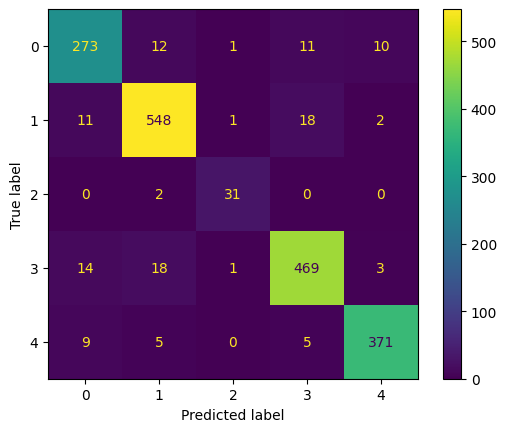

In [61]:
best_clf = clf_search.best_estimator_
label_pred = best_clf.predict(test_dataset[columns])
print(classification_report(test_label['encoded_category'], label_pred))
cm= ConfusionMatrixDisplay.from_estimator(best_clf, test_dataset, test_label['encoded_category'])

2. RandomForest

In [62]:
# defining the randomforest pipeline
clf_rf_ = Pipeline(
        steps =[('encoding', preprocessor),
              ('clf_rf', RandomForestClassifier()),
      ]
    )

#defining the hyperparameters
hyperparameters_rf = {
    'clf_rf__n_estimators': [100,200,300],
    'clf_rf__criterion': ['gini','entropy','log_loss'],
    'clf_rf__max_features': ['auto', 'sqrt'],
    'clf_rf__bootstrap': [True, False]
}


# create the GridSearch function
clf_search = GridSearchCV(clf_rf_, hyperparameters_rf, scoring= "accuracy", cv= 5, return_train_score=True) #we can use accuracy here since the dataset is balanced
# Fit all the possible hyper-parameters combinations using cross-validation.
_ =clf_search.fit(train_dataset_resampled[columns], train_label_resampled['encoded_category'])

In [63]:
print(clf_search.best_score_, clf_search.best_params_)

0.9373005605864597 {'clf_rf__bootstrap': False, 'clf_rf__criterion': 'gini', 'clf_rf__max_features': 'sqrt', 'clf_rf__n_estimators': 200}


Model Evaluation

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       307
           1       0.90      0.91      0.90       580
           2       1.00      0.67      0.80        33
           3       0.89      0.88      0.88       505
           4       0.88      0.96      0.92       390

    accuracy                           0.89      1815
   macro avg       0.91      0.84      0.87      1815
weighted avg       0.89      0.89      0.89      1815



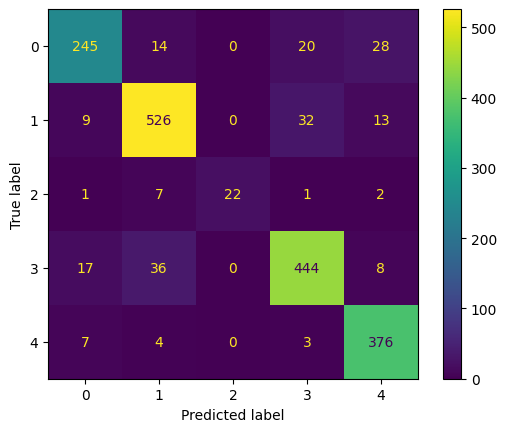

In [66]:
best_clf = clf_search.best_estimator_
label_pred = best_clf.predict(test_dataset[columns])
print(classification_report(test_label['encoded_category'], label_pred))
cm= ConfusionMatrixDisplay.from_estimator(best_clf, test_dataset, test_label['encoded_category'])

#### Task 2: Text Clarity Classification

For building the prototype model for text clarity classification, the columns to be used are 'paragraph','lexicon_count','difficult_words','text_clarity'

Extracting those columns from the dataset

In [68]:
features = ['paragraph','lexicon_count','difficult_words','text_clarity']
feature_dataset = coursework_dataset[features]

In [69]:
# checking for null values
feature_dataset.isna().sum()

paragraph             0
lexicon_count         0
difficult_words      18
text_clarity       9123
dtype: int64

The feature, difficult_words have 18 null values and the target variable 'text_clarity' have 9123 null values. But only null values in the difficult_words will be removed 

In [70]:
feature_dataset = feature_dataset.dropna(subset=['difficult_words'])

In [71]:
feature_dataset.isna().sum()

paragraph             0
lexicon_count         0
difficult_words       0
text_clarity       9105
dtype: int64

After removing null values, dataset has 9105 observations

Extractibg the first 1000 records for building the prototype

In [76]:
feature_dataset = feature_dataset.head(1000)

Preprocessing the paragraph column

In [77]:
# defining a function to clean the text data
def clean_text(x):
  return cleantext.clean(x,
      clean_all= True,
      extra_spaces= True,
      stemming= True,
      stopwords= True,
      lowercase= True,
      numbers= True,
      punct= True,
      reg = r"-",
      reg_replace = '',
      stp_lang = 'english'
)

In [78]:
feature_dataset['cleaned_paragraph'] = feature_dataset['paragraph'].apply(clean_text)

Using TF-IDF as vectorizer

In [170]:
EXTRA_PUNCT = string.punctuation
def preprocess_text_with_spacy(text_):
  """
  This function takes a Spacy doc and returns the list of its lemmas,
  """
  doc_ = nlp(text_)
  # here we take the lemmas, and now we also want to but only keep those that are NOT stop words, only digits, or punctuation.
  lemmas_ = [token.lemma_ for token in doc_ ]
  return [lemma for lemma in lemmas_ if lemma not in EXTRA_PUNCT]

Tokenizing the cleaned paragraph

In [80]:
nlp = spacy.load('en_core_web_md')
feature_dataset['tokenized_text'] = feature_dataset['cleaned_paragraph'].apply(preprocess_text_with_spacy)

In [81]:
tfidf_vectorizer = TfidfVectorizer(lowercase=False,tokenizer=lambda x: x)

# Fit and transform the text data in the column
tfidf_matrix = tfidf_vectorizer.fit_transform(feature_dataset['tokenized_text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(),index=feature_dataset.index)
preprocessed_data= pd.concat([feature_dataset, tfidf_df],axis=1)

In [82]:
new_feature_dataset = preprocessed_data.drop(columns=['paragraph','text_clarity','cleaned_paragraph','tokenized_text'])

In [84]:
new_feature_dataset.shape

(1000, 8438)

In [85]:
labels = feature_dataset['text_clarity']

In [86]:
label_encoder_train = LabelEncoder()
labels = (pd.Series(label_encoder_train.fit_transform(labels))).replace(2,-1)

In [87]:
labels.value_counts()

-1    991
 0      5
 1      4
Name: count, dtype: int64

In [88]:
scaler = StandardScaler()

In [89]:
scaled_data = pd.DataFrame(scaler.fit_transform(new_feature_dataset[['lexicon_count','difficult_words']]),index=new_feature_dataset.index)

In [90]:
new_feature_dataset[['lexicon_count','difficult_words']] = scaled_data

Generating Pseudo labels

In [92]:
self_training_model = LabelSpreading()
self_training_model.fit(new_feature_dataset, labels)

LabelSpreading()

In [129]:
pseudo_label = self_training_model.transduction_

In [130]:
mapping = {0:'clear_enough',1:'not_clear_enough'}
pseudo_label_data = [mapping[label] for label in pseudo_label]

In [133]:
pseudo_label_data = pd.Categorical(pseudo_label_data)

In [141]:
data.drop(columns=['text_clarity'],inplace=True)

In [142]:
data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies
...,...,...,...,...,...,...,...
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies
9343,50634005203,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies
9345,725259002815,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming


In [143]:
pseudo_labels_df = pd.DataFrame({'text_clarity':pseudo_label_data})

In [144]:
data = pd.concat([data,pseudo_labels_df],axis=1)

In [145]:
data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies,NaN
9343,50634005203,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies,NaN
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies,NaN
9345,725259002815,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming,NaN


In [146]:
data.to_csv("coursework_dataset.csv")

##### Model building using pseudo label

In [147]:
pseudo_label_data = pd.Categorical(pseudo_label)

In [148]:
pseudo_label_data

[0, 1, 0, 0, 1, ..., 0, 0, 1, 0, 1]
Length: 1000
Categories (2, int32): [0, 1]

In [149]:
pseudo_labels_df = pd.DataFrame({'text_clarity':pseudo_label_data})

In [150]:
pseudo_labels_df.value_counts()

text_clarity
0               699
1               301
Name: count, dtype: int64

here 0 indicates clear_enough and 1 indicates not_clear_enough. 

splitting the dataset

In [152]:
train_dataset, test_dataset, train_label, test_label = train_test_split(new_feature_dataset,pseudo_labels_df,
                                                                        test_size=0.2,
                                                                        stratify=pseudo_labels_df,
                                                                        shuffle=True,
                                                                        random_state=7
                                                                       )

Training Data

In [166]:
# Shape of input data
print("The shape of training dataset is: ")
print(train_dataset.shape)
# Shape of output data
print("The shape of the label data is: ")
print(train_label.shape)

The shape of training dataset is: 
(800, 8438)
The shape of the label data is: 
(800, 1)


In [153]:
train_label.value_counts()

text_clarity
0               559
1               241
Name: count, dtype: int64

Test data

In [154]:
# Shape of input data
print("The shape of test dataset is: ")
print(test_dataset.shape)
# Shape of output data
print("The shape of the label data is: ")
print(test_label.shape)

The shape of test dataset is: 
(200, 8438)
The shape of the label data is: 
(200, 1)


Since the class is imbalanced in the training data, performing over sampling

In [155]:
sampler = RandomOverSampler(random_state=42)
train_dataset_resampled , train_label_resampled = sampler.fit_resample(train_dataset,train_label)

In [156]:
train_dataset_resampled.shape

(1118, 8438)

In [157]:
train_label_resampled.shape

(1118, 1)

In [158]:
train_label_resampled.value_counts()

text_clarity
0               559
1               559
Name: count, dtype: int64

##### Logistic regression

In [160]:
# defining the logistic regression pipeline
clf_lr_ = Pipeline(
    steps =[
              ('clf_lr', LogisticRegression()),
    ]
    )

#defining the hyperparameters
hyperparameters_lr = {
    'clf_lr__penalty': ['l1','l2'],
    'clf_lr__solver': ['liblinear' ],
    'clf_lr__C': [0.01, 0.1,0.5,1],
}


# create the GridSearch function
clf_search = GridSearchCV(clf_lr_, hyperparameters_lr, scoring= "accuracy", cv= 5, return_train_score=True) #we can use accuracy here since the dataset is balanced
# Fit all the possible hyper-parameters combinations using cross-validation.
_ =clf_search.fit(train_dataset_resampled, train_label_resampled['text_clarity'])

In [161]:
print(clf_search.best_score_, clf_search.best_params_)

0.8801729660474056 {'clf_lr__C': 1, 'clf_lr__penalty': 'l1', 'clf_lr__solver': 'liblinear'}


In [162]:
best_clf = clf_search.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       140
           1       0.76      0.90      0.82        60

    accuracy                           0.89       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.90      0.89      0.89       200



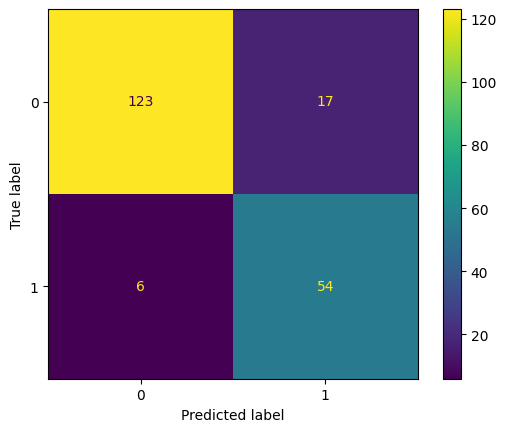

In [164]:
y_pred = best_clf.predict(test_dataset)
print(classification_report(test_label['text_clarity'], y_pred))
cm= ConfusionMatrixDisplay.from_estimator(best_clf, test_dataset, test_label['text_clarity'])

##### Random forest

In [165]:
# defining the randomforest pipeline
clf_rf_ = Pipeline(
        steps =[
              ('clf_rf', RandomForestClassifier()),
      ]
    )

#defining the hyperparameters
hyperparameters_rf = {
    'clf_rf__n_estimators': [100,200,300],
    'clf_rf__criterion': ['gini','entropy','log_loss'],
    'clf_rf__max_features': ['log2', 'sqrt'],
    'clf_rf__bootstrap': [True, False]
}


# create the GridSearch function
clf_search = GridSearchCV(clf_rf_, hyperparameters_rf, scoring= "accuracy", cv= 5, return_train_score=True) #we can use accuracy here since the dataset is balanced
# Fit all the possible hyper-parameters combinations using cross-validation.
_ =clf_search.fit(train_dataset, train_label['text_clarity'])

In [167]:
print(clf_search.best_score_, clf_search.best_params_)

0.8924999999999998 {'clf_rf__bootstrap': False, 'clf_rf__criterion': 'gini', 'clf_rf__max_features': 'sqrt', 'clf_rf__n_estimators': 300}


In [168]:
best_clf = clf_search.best_estimator_

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       140
           1       0.95      0.68      0.80        60

    accuracy                           0.90       200
   macro avg       0.92      0.83      0.86       200
weighted avg       0.90      0.90      0.89       200



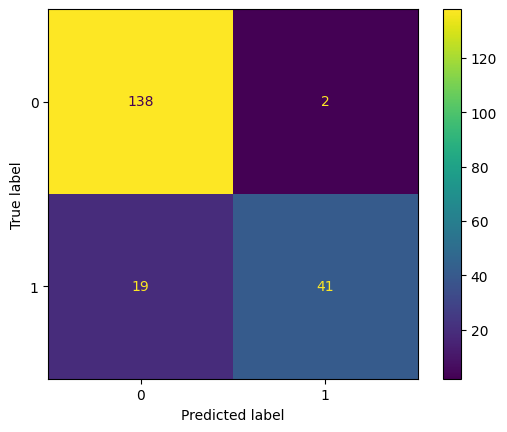

In [169]:
y_pred = best_clf.predict(test_dataset)
print(classification_report(test_label['text_clarity'], y_pred))
cm= ConfusionMatrixDisplay.from_estimator(best_clf, test_dataset, test_label['text_clarity'])